# Textures, vertical exaggeration, bathymetry

This notebook covers different ways to change or improve the visualisation.
* Change ocean colour and texture
* Exagerate the height of mountains
* View the ocean floor (Bathymetry)
* Use a custom elevation map

## Initial Setup

In [2]:
import datetime
import os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import accessvis

accessvis.resolution_selection(default=1)

Low-res 2K - fast for testing
Mid-res 4K - good enough for full earth views
High res 8K - better if showing close up at country scale
Ultra-high 16K - max detail but requires a fast GPU with high memory


Dropdown(description='Detail:', options=(('Low-res 2K', 1), ('Mid-res 4K', 2), ('High-res 8K', 3), ('Ultra-hig…

As a reference, here is an image without any adjustments.

Note that the default texture is 'bluemarble'

lv.translation(0.0, 0.0, -22.05)
lv.rotation(0.0, 0.0, 0.0)



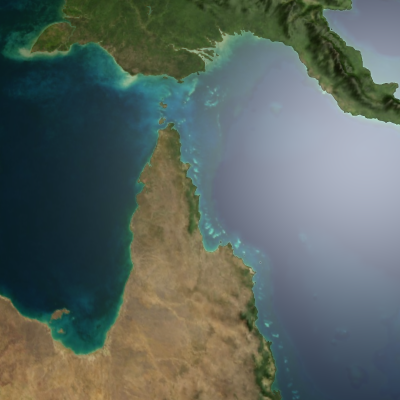

In [3]:
lv = accessvis.plot_earth(waves=False, lighting=True)
lv.camera({'translate': [0.486, -0.75, -7.878],
 'rotate': [-0.086, -0.946, 0.149, 0.274],
 'xyzrotate': [-157.759, -29.523, 163.674],
 'fov': 45.0})
lv.display((400,400))

## Ocean Colour
We can set the ocean to any colour, however we cannot also have waves texture.

RGBA values range from 0 to 1.


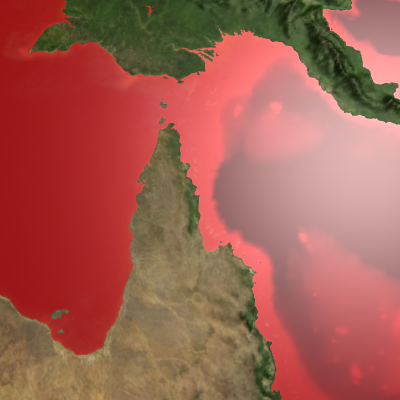

In [4]:
accessvis.update_earth_values(lv, ocean=[0.9, 0.1, 0.1, 1.0], waves=False)
lv.display((400,400))

## Ocean Texture
Notice how the surface of the ocean is no longer solid, and instead has a wave pattern.


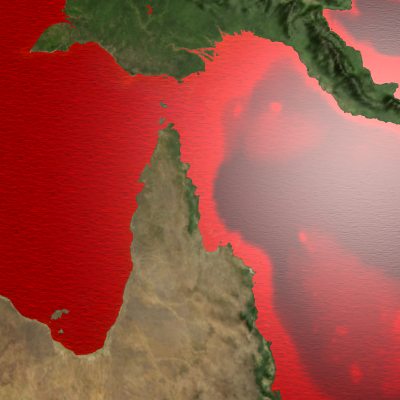

In [5]:
accessvis.update_earth_values(lv,  waves=True, texture='relief')
lv.display((400,400))

## Mountain Height Exageration
Below we are increasing the vertical exaggeration. We have chosen a huge value to clearly demonstrate the effect. Notice how NZ and Indonesia are now incredibly spiky.


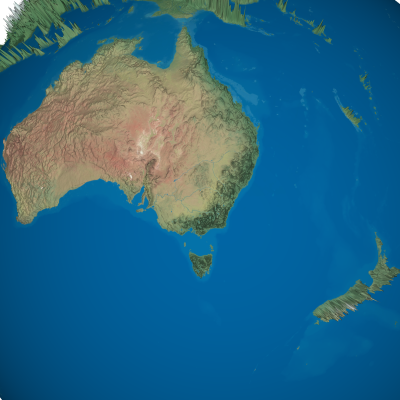

In [6]:
lv = accessvis.plot_earth(lighting=False, texture='relief', background="white", vertical_exaggeration=200)
lv.translation(0.486, -0.75, -12.684)
lv.rotation(-137.839, -22.053, 155.435)
lv.display((400,400))

## Bathymetry/Ocean Floor
Below we have removed the ocean so we can now see the ocean floor.

Bathymetry data from [boadc.ac.uk](https://www.bodc.ac.uk/data/hosted_data_systems/gebco_gridded_bathymetry_data/)


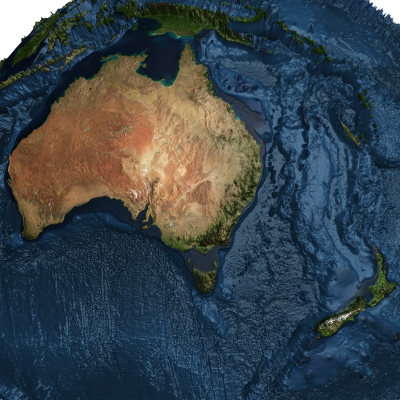

In [7]:
lv = accessvis.plot_earth(lighting=True,  background="white", bathymetry=True, vertical_exaggeration = 50)
lv.translation(0.486, -0.75, -12.684)
lv.rotation(-137.839, -22.053, 155.435)
accessvis.update_earth_values(lv, ocean=[0.3, 0.7, 1, 1.0], )
lv.display((400,400))

If you need to access the elevation data directly, you can use load_topography(). Note that this data is formatted 180 degrees off, so we need to roll it around.

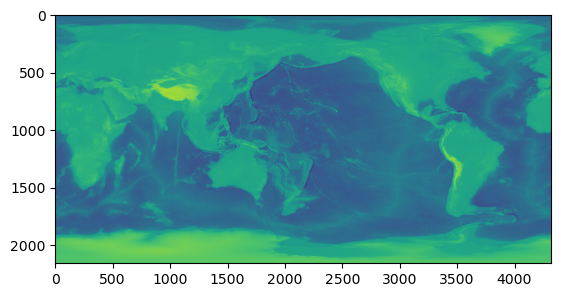

In [8]:
arr = accessvis.load_topography(subsample=5)
arr = np.roll(arr, arr.shape[1] // 2, axis=1) # The data is formatted 180 degrees off. This rotates it.
plt.imshow(arr)

We can choose a colourscheme and change the colour based on elevation. 

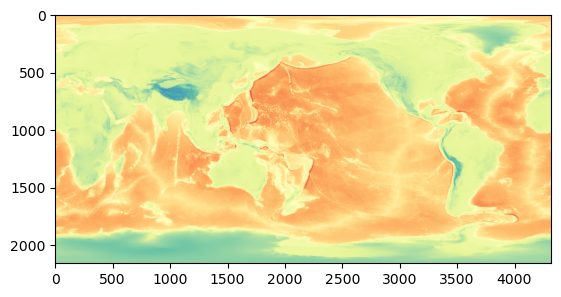

In [9]:
colours = accessvis.array_to_rgba(arr, colourmap='Spectral')
plt.imshow(colours)

Overlaying these colours onto the Earth


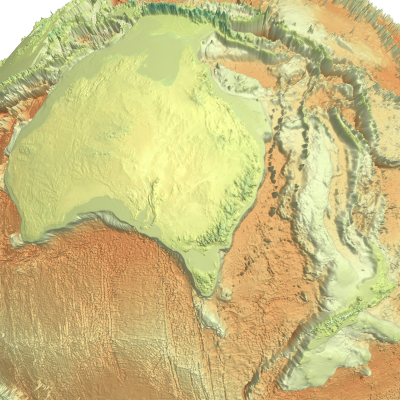

In [10]:
accessvis.update_earth_values(lv, dataMode=0, dataAlpha=0.75, data=colours)
lv.display((400,400))

## Interactive Viewer

In [11]:
lv.window((600,600))

## Animation
Animating the final globe rotating.

In [12]:
from tqdm.notebook import tqdm

#Reset view
lv.reset()
lv.translation(0, 0, -17.5)
lv.rotation(0.0, -125.0, 0.0) #Rotate to Australia

with lv.video(filename='earth_rotating.mp4', quality=3, resolution=(1024,1024), width=512, height=512, params="autoplay") as v:    
    for d in tqdm(range(0,90,1), desc='', miniters=1):
        lv.rotate('y', 1)
        lv.render()

    #Final frames - necessary or video playback is cut short
    for i in range(40):
        lv.render()

Output #0, mp4, to 'earth_rotating.mp4':
  Stream #0:0: Unknown: none


  0%|          | 0/90 [00:00<?, ?it/s]